In [209]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

In [210]:
filepath="data/pima-indians-diabetes.xls"
all_df=pd.read_excel(filepath)

In [211]:
cols=['Outcome','Pregnancies','Glucose','Blood','Skin','Insulin',
      'BMI','Diabetes', 'Age']
all_df=all_df[cols]

In [212]:
all_df[:5]

,Outcome,Pregnancies,Glucose,Blood,Skin,Insulin,BMI,Diabetes,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33


In [213]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [214]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 768 train: 616 test: 152


In [215]:
 def PreprocessData(raw_df):
    
    zero_not_accepted = ['Glucose', 'Blood', 'Skin', 'BMI', 'Insulin']        
    for column in zero_not_accepted: 
        mean = int(raw_df[column].mean(skipna=True))
        raw_df[column].replace(0, mean,inplace=True) 
     
    ndarray = raw_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [216]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

/home/cool/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [217]:
train_Features[:2]

array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.08052885,
        0.31492843, 0.23244863, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.08052885,
        0.17177914, 0.11429795, 0.16666667]])

In [218]:
train_Label[:2]

array([1., 0.])

In [219]:
test_Features[:2]

array([[0.76923077, 0.77941176, 0.52380952, 0.23404255, 0.11132075,
        0.62025316, 0.26952437, 0.26530612],
       [0.38461538, 0.76470588, 0.5       , 0.25531915, 0.30188679,
        0.23417722, 0.29888432, 0.6122449 ]])

In [220]:
test_Label[:2]

array([1., 1.])

In [221]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [222]:
train_Features.shape

(616, 8)

In [223]:
train_Features = train_Features.reshape(train_Features.shape[0], 4, 2, 1)

In [224]:
model = Sequential()

In [225]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(4,2,1), 
                 activation='relu'))

In [226]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [227]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [228]:
model.add(Dropout(0.25))

In [229]:
model.add(Flatten())

In [230]:
model.add(Dense(128, activation='tanh'))

In [231]:
model.add(Dropout(0.25))

In [232]:
model.add(Dense(1,activation='sigmoid'))

In [233]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 4, 2, 1000)        2000      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 2, 1000)        1001000   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 2, 1000)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 2, 1000)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1024128   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

In [234]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
616/616 [==============================] - 4s 7ms/step - loss: 0.2413 - acc: 0.6299


In [235]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=70,verbose=1)

Train on 492 samples, validate on 124 samples
Epoch 1/10
492/492 [==============================] - 3s 6ms/step - loss: 0.1962 - acc: 0.6707 - val_loss: 0.3195 - val_acc: 0.6290
Epoch 2/10
492/492 [==============================] - 2s 5ms/step - loss: 0.2008 - acc: 0.7154 - val_loss: 0.1604 - val_acc: 0.7661
Epoch 3/10
492/492 [==============================] - 3s 6ms/step - loss: 0.1674 - acc: 0.7581 - val_loss: 0.1814 - val_acc: 0.7419
Epoch 4/10
492/492 [==============================] - 3s 6ms/step - loss: 0.1578 - acc: 0.7825 - val_loss: 0.3420 - val_acc: 0.4919
Epoch 5/10
492/492 [==============================] - 3s 5ms/step - loss: 0.1895 - acc: 0.7033 - val_loss: 0.2164 - val_acc: 0.6613
Epoch 6/10
492/492 [==============================] - 3s 5ms/step - loss: 0.1719 - acc: 0.7358 - val_loss: 0.1707 - val_acc: 0.7258
Epoch 7/10
492/492 [==============================] - 3s 5ms/step - loss: 0.1548 - acc: 0.7744 - val_loss: 0.3007 - val_acc: 0.5242
Epoch 8/10
492/492 [==========

In [236]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

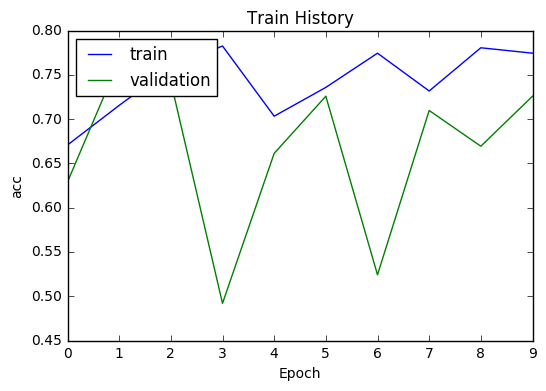

In [237]:
show_train_history(train_history,'acc','val_acc')

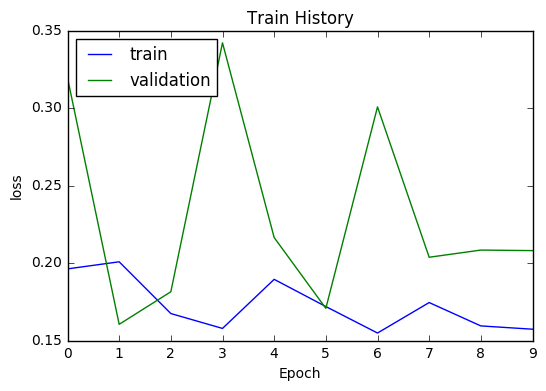

In [238]:
show_train_history(train_history,'loss','val_loss')

In [239]:
test_Features = test_Features.reshape(test_Features.shape[0], 4, 2, 1)

In [240]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

152/152 [==============================] - 0s 1ms/step


In [241]:
scores[1]

0.7236842073892292